**Sprint-3_Add Layers, Traing and Test Models**

In [45]:
import numpy as np 
import pandas as pd 
import datetime
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
import itertools
import statsmodels.api as sm

In [43]:
df=pd.read_csv("Crude Oil Prices Daily.csv")

In [6]:
df.head()

,Date,Closing Value
0,1/2/1986,25.56
1,1/3/1986,26.00
2,1/6/1986,26.53
3,1/7/1986,25.85
4,1/8/1986,25.87


In [48]:
dateparse = lambda x: pd.datetime.strptime(x, '%b %d, %Y')

In [50]:
df = df.sort_values('Date')
df = df.groupby('Date')['Closing Value'].sum().reset_index()
df.set_index('Date', inplace=True)

In [51]:
def DfInfo(df_initial):
    # gives some infos on columns types and numer of null values
    tab_info = pd.DataFrame(df_initial.dtypes).T.rename(index={0: 'column type'})
    tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0: 'null values (nb)'}))
    tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum() / df_initial.shape[0] * 100).T.
                               rename(index={0: 'null values (%)'}))
    return tab_info

In [52]:
DfInfo(df)

,Closing Value
column type,float64
null values (nb),0
null values (%),0.0


In [53]:
df.index

Index(['1/1/2018', '1/10/1986', '1/10/1989', '1/10/1990', '1/10/1991',
       '1/10/1992', '1/10/1994', '1/10/1995', '1/10/1996', '1/10/1997',
       ...
       '9/9/2004', '9/9/2005', '9/9/2008', '9/9/2009', '9/9/2010', '9/9/2011',
       '9/9/2013', '9/9/2014', '9/9/2015', '9/9/2016'],
      dtype='object', name='Date', length=8223)

In [55]:
scaler = MinMaxScaler(feature_range = (0, 1))
df = sc.fit_transform(df)

In [56]:
train_size = int(len(df) * 0.70)
test_size = len(df) - train_size
train, test = df[0:train_size, :], df[train_size:len(df), :]

In [57]:
def create_data_set(_data_set, _look_back=1):
    data_x, data_y = [], []
    for i in range(len(_data_set) - _look_back - 1):
        a = _data_set[i:(i + _look_back), 0]
        data_x.append(a)
        data_y.append(_data_set[i + _look_back, 0])
    return np.array(data_x), np.array(data_y)

In [58]:
look_back =90
x_train,y_train,x_test,y_test = [],[],[],[]
x_train,y_train=create_data_set(train,look_back)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test,y_test=create_data_set(test,look_back)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [67]:
print(x_train.shape), print(y_train.shape)

(5665, 90, 1)
(1, 5665)


(None, None)

In [68]:
print(x_test.shape), print(y_test.shape)

(2376, 90, 1)
(1, 2376)


(None, None)

In [69]:
x_train

array([[[0.        ],
        [0.17651917],
        [0.12249673],
        ...,
        [0.25992705],
        [0.54820728],
        [0.62893125]],

       [[0.17651917],
        [0.12249673],
        [0.15759411],
        ...,
        [0.54820728],
        [0.62893125],
        [0.67916867]],

       [[0.12249673],
        [0.15759411],
        [0.18959466],
        ...,
        [0.62893125],
        [0.67916867],
        [0.62934416]],

       ...,

       [[0.40189939],
        [0.92209758],
        [0.48909229],
        ...,
        [0.14231643],
        [0.1280022 ],
        [0.22758241]],

       [[0.92209758],
        [0.48909229],
        [0.52866286],
        ...,
        [0.1280022 ],
        [0.22758241],
        [0.18250637]],

       [[0.48909229],
        [0.52866286],
        [0.64014865],
        ...,
        [0.22758241],
        [0.18250637],
        [0.17631271]]])

In [59]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [60]:
regressor = Sequential()

regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.1))

regressor.add(Dense(units = 1))


In [61]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=5)

In [62]:
history =regressor.fit(x_train, y_train, epochs = 20, batch_size = 15,validation_data=(x_test, y_test), callbacks=[reduce_lr],shuffle=False)

Epoch 1/20
378/378 [==============================] - 66s 152ms/step - loss: 0.0194 - val_loss: 0.0110 - lr: 0.0010
Epoch 2/20
378/378 [==============================] - 57s 151ms/step - loss: 0.0128 - val_loss: 0.0106 - lr: 0.0010
Epoch 3/20
378/378 [==============================] - 55s 144ms/step - loss: 0.0120 - val_loss: 0.0106 - lr: 0.0010
Epoch 4/20
378/378 [==============================] - 56s 148ms/step - loss: 0.0113 - val_loss: 0.0108 - lr: 0.0010
Epoch 5/20
378/378 [==============================] - 55s 147ms/step - loss: 0.0112 - val_loss: 0.0105 - lr: 0.0010
Epoch 6/20
378/378 [==============================] - 56s 148ms/step - loss: 0.0111 - val_loss: 0.0104 - lr: 0.0010
Epoch 7/20
378/378 [==============================] - 55s 145ms/step - loss: 0.0109 - val_loss: 0.0105 - lr: 0.0010
Epoch 8/20
378/378 [==============================] - 55s 145ms/step - loss: 0.0109 - val_loss: 0.0102 - lr: 0.0010
Epoch 9/20
378/378 [==============================] - 56s 149ms/step - l

In [72]:
regressor.save('model1.h5')

In [63]:
train_predict = regressor.predict(x_train)
test_predict = regressor.predict(x_test)

75/75 [==============================] - 3s 42ms/step


In [64]:
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

Train Mean Absolute Error: 8.628606553408483
Train Root Mean Squared Error: 12.48177120313532
Test Mean Absolute Error: 7.733718616936406
Test Root Mean Squared Error: 11.325645515332173


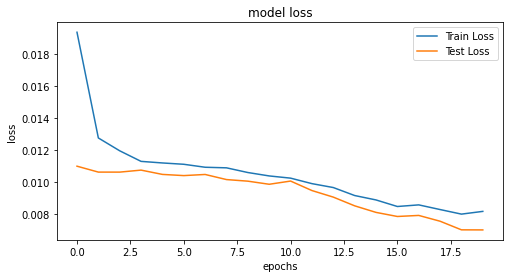

In [65]:
print('Train Mean Absolute Error:', mean_absolute_error(y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test[0], test_predict[:,0])))
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

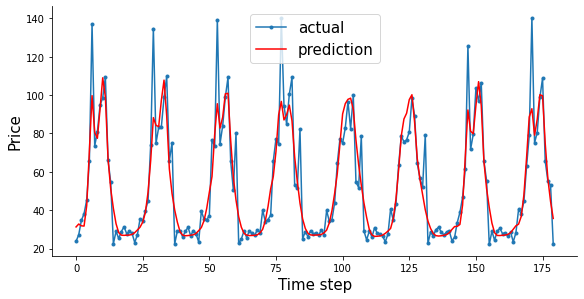

In [66]:
aa=[x for x in range(180)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[0][:180], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:180], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();